In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Iris Dataset

이번 실습은 붓꽃(iris, 아이리스) 데이터를 활용하여 붓꽃의 세부 종류를 구분하는 문제를 풉니다.

붓꽃의 종류는 크게 **iris setosa** / **iris versicolor** / **iris virginica**가 존재하며, 주어진 꽃잎과 꽃받침의 길이와 너비를 활용해 해당 꽃의 종류를 맞추는 알고리즘을 Single-layer Neural Network로 해결하면 됩니다.

각 컬럼에 대한 설명은 다음과 같습니다. 출처: [ai-times](http://ai-times.tistory.com/418)

  * **sepal length (cm)**: 꽃받침의 길이
  * **sepal width (cm)**: 꽃받침의 너비
  * **petal length (cm)**: 꽃잎의 길이
  * **petal width (cm)**: 꽃잎의 너비
  * **species**: 붓꽃의 종류. iris setosa(0) / iris versicolor(1) / iris virginica(2) 의 세 종류가 있다.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
X = iris["data"]

print(X.shape)
X[0:5]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
y = iris["target"]

print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
data = pd.DataFrame(X, columns=iris["feature_names"])
data["species"] = y

num_species = len(data["species"].unique())

print("The total number of species = {0}".format(num_species))

print(data.shape)
data.head()

The total number of species = 3
(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize

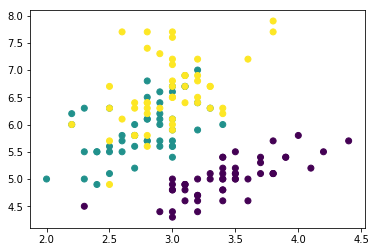

In [6]:
plt.scatter(data["sepal width (cm)"], data["sepal length (cm)"], c=data["species"])

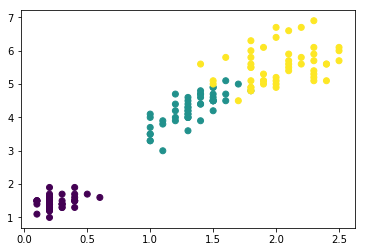

In [7]:
plt.scatter(data["petal width (cm)"], data["petal length (cm)"], c=data["species"])

### Preprocessing

In [8]:
num_species = len(np.unique(y))

y_hot = np.eye(num_species)[y]

print(y_hot.shape)
y_hot[0:10]

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Define Sigmoid

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

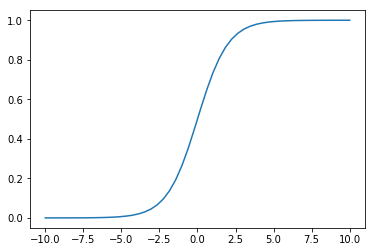

In [10]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [11]:
## Write code here

In [12]:
num_epoch = 500
learning_rate = 1.0

w = np.random.uniform(low=-1.0, high=1.0, size=(4, 3))
b = np.random.uniform(low=-1.0, high=1.0, size=(1, 3))

for epoch in range(num_epoch):
    y_predict = X.dot(w) + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict.argmax(axis=1)
    accuracy = (predict==y).mean()
    
    if accuracy > 0.95:
        break
    if epoch % 10 == 0:
        print(f"{epoch:2}, accuracy = {accuracy:.6f}")
        
    w = w - learning_rate * X.T.dot(y_predict - y_hot) / len(X)
    b = b - learning_rate * (y_predict - y_hot).mean(axis=0)
    
print("----"*10)
print(f"{epoch:2}, accuracy = {accuracy:.6f}")

 0, accuracy = 0.333333
10, accuracy = 0.333333
20, accuracy = 0.666667
30, accuracy = 0.666667
40, accuracy = 0.580000
50, accuracy = 0.660000
60, accuracy = 0.613333
70, accuracy = 0.440000
80, accuracy = 0.620000
90, accuracy = 0.660000
100, accuracy = 0.746667
----------------------------------------
101, accuracy = 0.953333


In [13]:
y_predict = X.dot(w) + b
y_predict = sigmoid(y_predict)
    
predict = y_predict.argmax(axis=1)

result = data.copy()
result["species(predict)"] = predict

result.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species(predict)
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
